chapter_2 Supervised Learning
-----------

## 2.1 분류와 회귀

#### classification
- 분류
  - 이진 분류 : binary classification
  - 다중 분류 : multiclass classification


#### regression
- 회귀
  - 연속적인 숫자 또는 프로그래밍 용어로 말하면 부동소수점수를 예측하는 것
  - 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀의 하나의 예
  - 수확량 예측 등등

### 2.2 Generalization, overfitting, underfitting

#### Generalization
- 일반화
- 모델이 처음 보는 데이터에 대해 정확하게 예측 할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 함
- 그래서 모델을 만들 때는 가능한 정확하게 일반화 되도록 해야 함

#### overfitting
- 과대적합
- 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것
- 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 발생함
- 한 마디로 훈련 세트에만 최적화 된 모델을 생성

#### underfitting
- 과소 적합
- 너무 간단한 모델이 선택 되는 것


sweet spot을 어떻게 찾을 것인가?

![alt text](https://github.com/amueller/introduction_to_ml_with_python/raw/62a9b3fb553650b0bab0f6a738da033be6e5af55/images/overfitting_underfitting_cartoon.png)

### 2.2.1 모델 복잡도와 데이터셋 크기의 관계

> 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련

> 데이터셋에 다양한 데이터 포인트가 많을 수록 과대적합 없이 더 복잡한 모델을 만들 수 있다.

> 그러나 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 도움이 되지 않는다.

> 데이터양의 힘을 과소 평가하지 말고 열심히 모으자.

### 2.3 지도 학습 알고리즘

### 2.3.1 예제용 데이터셋

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib
from matplotlib import font_manager, rc
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


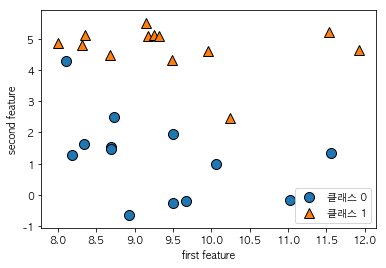

In [2]:
# make binary dataset using mglearn

X, y = mglearn.datasets.make_forge()

# draw scatter plot
mglearn.discrete_scatter(X[:, 0], X[:, 1:], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [3]:
print(X.shape)

(26, 2)


--------

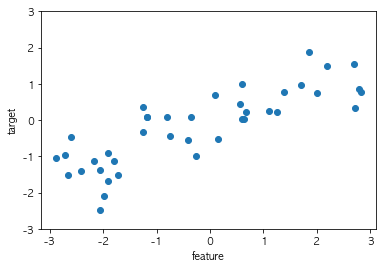

In [4]:
# make dataset for regression

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

#### 위스콘신 유방암 데이터

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print(cancer['data'].shape)

(569, 30)


In [7]:
# benign : 양성, malignant : 악성

print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# dataset for regression


from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [10]:
# completed feature engineering dataset
# feature engineering을 이용해서 13개에서 104개로 늘림

X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


### 2.3.2 KNN

#### KNN?
- K-Nearset Neighbors
- 새로운 데이터 포인트에 대해 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, **최근접 이웃**을 찾음

#### KNN classification

/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


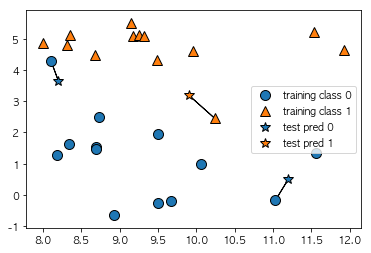

In [11]:
# 1개로 정할 때

mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


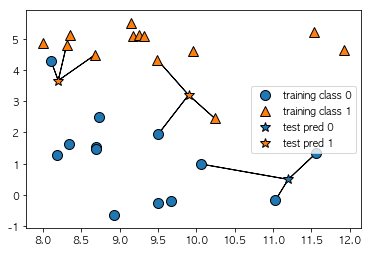

In [12]:
# 이웃하는 점의 개수를 3개로 정할 때

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [17]:
clf.score?

Signature: clf.score(X, y, sample_weight=None)
Docstring:
Returns the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like, shape = (n_samples, n_features)
    Test samples.

y : array-like, shape = (n_samples) or (n_samples, n_outputs)
    True labels for X.

sample_weight : array-like, shape = [n_samples], optional
    Sample weights.

Returns
-------
score : float
    Mean accuracy of self.predict(X) wrt. y.
File:      ~/anaconda3/lib/python3.6/site-packages/sklearn/base.py
Type:      method


In [18]:
clf.score(X_test, y_test)

0.8571428571428571

#### KNN-classifier 분석

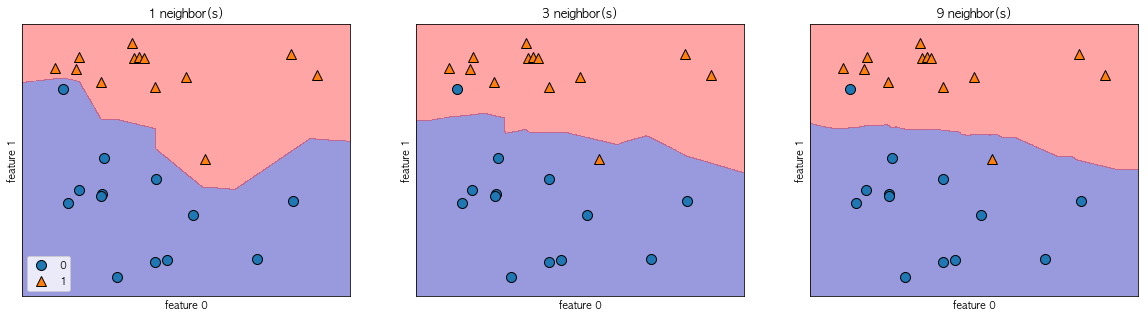

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


decision boundary : 결정 경계
- n_neighbor = 1일 때는 decision boundary 가 훈련 데이터에 가깝게 따라감
- 숫자를 늘릴 수록 경계가 부드러워짐
- n_neighbor 적게 사용할 수록 모델의 복잡도가 높아지고, 많이 사용할 수록 복잡도는 낮아짐

#### complexity vs generalization with model

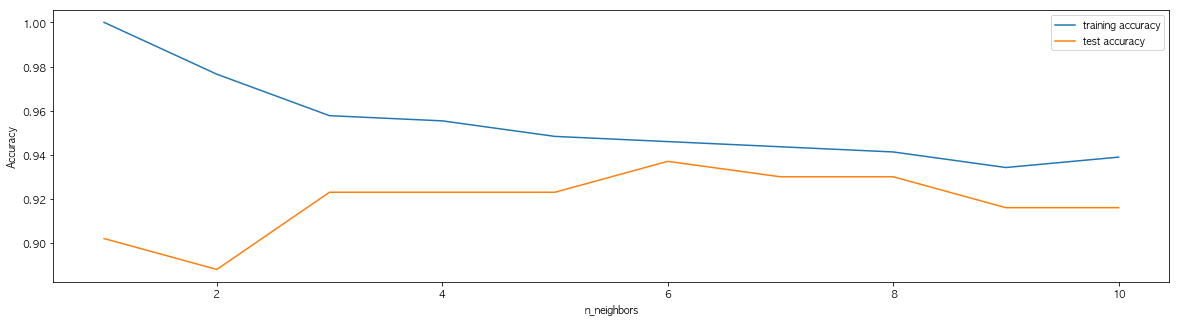

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(figsize = (20, 5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

n_neighbors가 하나 일 때
- training accuracy가 완벽, 그러나 n_neighbors가 늘어나면 떨어진다.
- test accuracy가는 낮음, 그러나 n_neighbors가 늘어나면 변화가 있다.
- 적은 경우는 모델을 너무 복잡하게 만든 다는 것, 반대로 많을 경우 모델이 너무 단순해서 정확도가 나빠짐
- 이 경우에 한해서 가장 좋을 때는 6개를 사용 할 때임

#### KNN regression

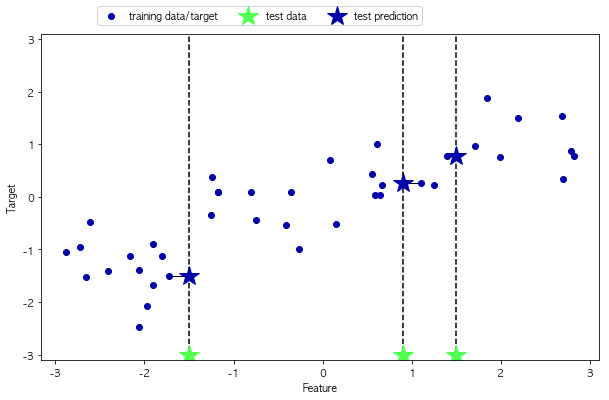

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

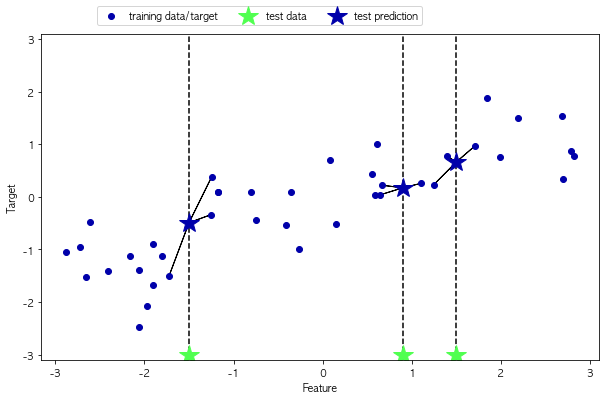

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [24]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### R^2?

- [결정계수에 대한 직관 기르기](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
- 결정 계수
  - 회귀 모델에서 예측의 적합도를 측정한 것
  - 보통 0~1사이의 값이 됨
  - 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우
  - 음수가 될 수도 있음, 이 때는 타깃이 상반된 경향을 가지는 경우에 한함
  - R-square가 1에 가깝다는 의미는 바꿔 말하면 이 회귀선은 데이터에 fit한 것을 알 수 있다. 
  - R-square가 0에 가깝다는 의미는 바꿔 말하면 회귀선의 설명력(Regression line)이 낮다는 의미가 되며, 데이터가 모형에 fit하지 않음을 뜻한다.

$$
1\quad -\quad \frac { \sum { { (y-y) }^{ 2 } }  }{ \sum { { (y-\hat { y } ) }^{ 2 } }  } 
$$

#### How to use R^2 in sklearn?

- official document : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [30]:
from sklearn.metrics import r2_score

r2_score(y_test, reg.predict(X_test))

0.8344172446249605

#### KNN regression 분석

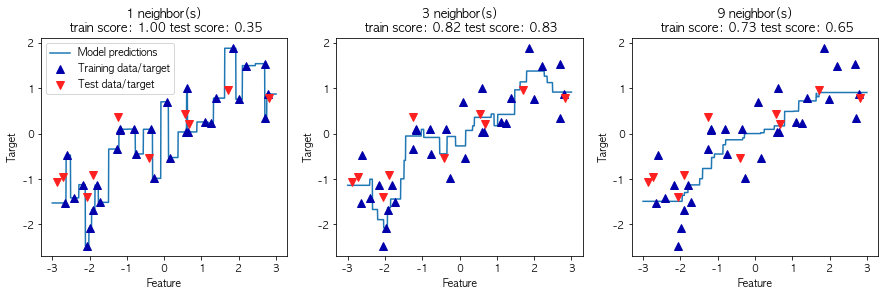

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

#### 장단점과 매개변수

매개변수
- 중요한 것은 두 개
  - 데이터 포인트 사이의 거리를 재는 방법 : 유클리디안 distance를 사용 : https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%81%B4%EB%A6%AC%EB%93%9C_%EA%B1%B0%EB%A6%AC
    - 쉽게 말하면 두 점 사이의 거리를 재는 공식 생각하면 됩니다.
    - feature 마다 값의 범위가 다르면 범위가 작은 특성에 크게 영향을 받음, 결론적으로 scaling을 잘해야 함
  - 이웃의 수 : 잘 설정해야 함
  
  
장점
- 이해하기 쉬운 모델
- parameter 조정이 적어도 좋은 성능 얻을 수 있음
- 복잡한 알고리즘 적용 전에 시도해 볼 수 있는 시작 방법임


단점
- train set이 매우 크면(feature, sample 등이 크면) 예측이 느려짐
- 데이터 전처리가 무척 중요함
- feature가 수백 개 이상이 될 경우에는 잘 동작하지 않음
- 특성 값이 대부분 0인 (즉, 희소한...sparse) 데이터셋에서는 특히 잘 작동하지 않음

현업에서는 잘 안 쓰임

### 2.3.3 선형 모델

#### 회귀의 선형 모델

$$
\hat { y } =w[0]\quad +\quad x[0]\quad +\quad w[1]\quad \times \quad x[1]\quad +\quad \cdot \cdot \cdot \quad +\quad w[p]\quad \times x[p]\quad +\quad b
$$


- w와 b는 모델이 학습할 파라미터
- y hat은 모델이 만들어낸 예측값
- feature가 하나인 데이터셋은 아래와 같이 표현할 수 있다.

$$
\hat { y } =w[0]\times x[0]+b
$$

w[0]: 0.393906  b: -0.031804


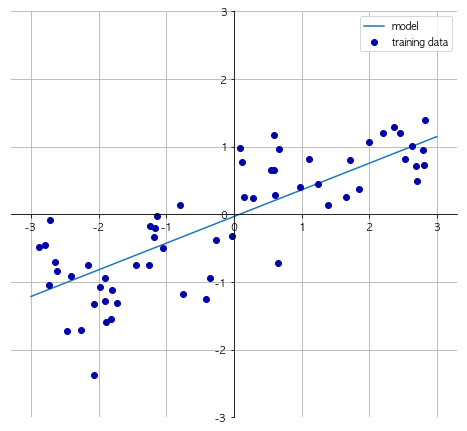

In [32]:
mglearn.plots.plot_linear_regression_wave()

#### OLS - ordinary least squares
- 한국어로 하면 최소제곱법
- 가장 간단하고 오래된 회귀용 선형 알고리즘
- MSE를 최소화 하는 파라미터 w와 b를 찾음
- w : 가중치,  weight, coefficient
- b : coffeset(편향), intercept(절편)


**mean squared error**
- official document : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
- 평균제곱오차
- 예측한 값과 타겟값의 차이를 제곱하여 더한 후 샘플의 개수로 나눈 방법
$$
MSE\quad =\quad \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ { ({ y }_{ i }-{ \hat { y }  }_{ i }) }^{ 2 } } 
$$




선형 회귀는 parameter가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법도 없다.

In [33]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [34]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, lr.predict(X_test))

32.2077543862573

In [38]:
# boston house dataset

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


**Notice**

- 성능 차이는 모델이 과대적합되었다는 결론이므로, 복잡도를 제어할 수 있는 모델을 사용해야 함
- 기존 방식 대비 널리 쓰이는 모델은 **Ridge**

#### Ridge
- 회귀를 위한 선형 모델
- 리지에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라, 추가 제약 조건을 만족시키기 위한 목적도 존재
- 가중치의 절댓값을 가능한 한 작게 만드는 것이 목표
  - **다시 말해 w의 모든 원소가 0에 가깝게 되길 원함**
- **직관적으로 생각하면 모든 특성이 출력에 주는 영향을 최소한으로 만드는 것 = 기울기를 작게 만듬**

**Regularization**
- overfitting이 되지 않도록 강제로 제한을 하는 것을 Regularization(규제) 라고 한다.
- Ridge 는 L2라고도 함
- 수식 설명
  - α 값을 크게 하면 패널티의 효과가 커지고(가중치 감소), α 값을 작게 하면 반대가 된다.
$$
\alpha \sum _{ j=1 }^{ m }{ { w }_{ j }^{ 2 } } 
$$


**How to handle a ridge parameter α?**
- alpha 값을 조정해서 모델을 얼마나 단순화할지 지정할 수 있다.
- 기본 값은 1.0
- 값의 조정에 따라 결과가 달라짐

In [39]:
# 선형 모델 보다 테스트 데이터에 대한 결과는 낫다. 

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [40]:
# alpha = 10

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [41]:
# alpha = 0.1

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


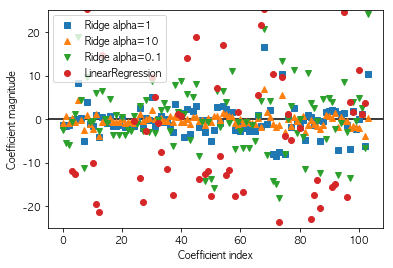

In [42]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

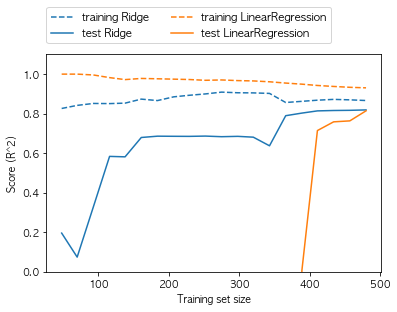

In [43]:
# learning curve : 학습 곡선
# alpha를 고정하고 훈련 데이터의 크기를 변화시켜 실험

mglearn.plots.plot_ridge_n_samples()

- train 데이터 셋에서는 linear Regression이 더 나으나, test 데이터 셋에서는 Ridge가 더 잘됨
- 데이터 셋 크기 400 미만에서는 선형 회귀는 어떤 것도 학습하지 못함
  - 단 데이터 셋이 늘어나면서 따라잠음

#### Lasso

- Ridge와 마찬가지로 계수를 0에 가깝게 만들려고 함
- 방식은 다름
- L1 Regularization이라고 말함
- 사용하게 되면 어떤 경우에는 계수 값이 0이 될 수도 있다. 즉, 완전히 제외되는 특성이 생길 수 있다.
  - 의도치 않게 feature selection이 자동으로 되는 효과
  
**수식 설명**
- weight vector의 L1 norm을 사용
  - 다른 말로 하면 계수의 절댓값의 합
  - alpha를 크게 하면 패널티의 효과가 커지고(가중치 감소), 작게 하면 반대가 된다.

$$
\alpha \sum _{ j=1 }^{ m }{ { \left| { w }_{ j } \right|  } } 
$$

In [44]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [45]:
# feature : 4개 만 사용

print(lasso.coef_)

[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0.         -0. 

- Lasso도 alpha로 조절 할 수 있다.
- underfitting을 줄이기 위해 alpha를 줄임
  - 이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 함

In [46]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [47]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


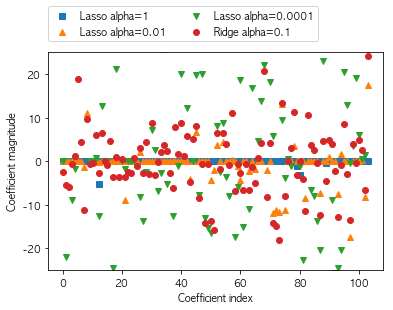

In [48]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

#### 무엇을 사용해야 할까?
- 실제로는 리지를 선호
- 상황에 맞게 쓰는 게 정답
- elasticnet도 있다
  - 리지와 라소의 패널티를 결합한 모델
  - official document : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

#### 분류용 선형 모델

선형 모델은 분류에도 널리 사용


**binary classification**
$$
\hat { y } =w[0]\quad +\quad x[0]\quad +\quad w[1]\quad \times \quad x[1]\quad +\quad \cdot \cdot \cdot \quad +\quad w[p]\quad \times x[p]\quad +\quad b\quad >\quad 0
$$

선형 회귀와 비슷
- 다른 건 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0 과 비교
  - 0보다 작으면 클래스를 -1로 예측
  - 0보다 크면 클래스를 +1로 예측
  
분류용 선형 모델에서는 **decision boundary(결정 경계)**가 입력의 선형 함수
- 선형 분류기는 선, 평면, hyperplane을 사용해서 두 개의 클래스를 구분하는 분류기
- 알고리즘 다양, 구별 방법은 다음과 같다.
  - 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
  - 사용할 수 있는 regularization이 있다면 어떤 방식인지
  

가장 널리 알려진 선형 분류 알고리즘은
- LogisticRegression : 로지스틱 회귀
- SVM : 서포트 벡터 머신

/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


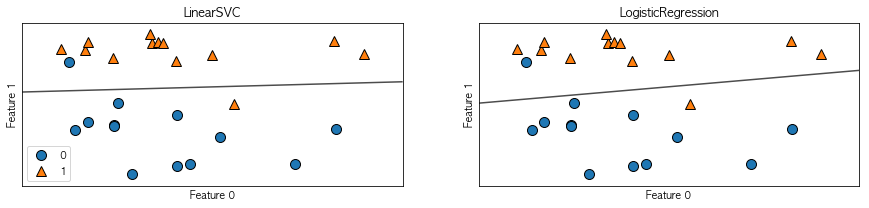

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

해석
- 경계를 기준으로 새로운 데이터가  직선 위쪽에 놓이면 클래스 1, 반대에 놓이면 클래스 0으로 분류
- 위의 그림 기준, 두 개의 그래프가 1개를 잘못 분류함
- L2 사용함
- regularization을 결정하는 건 parameter C임
  - 기본값 1.0
  - C가 높으면 Regularization 감소, train에 가능한 맞추려고 함
  - 반대일 경우 일반화

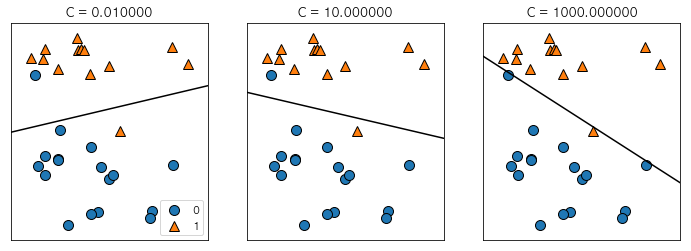

In [72]:
mglearn.plots.plot_linear_svc_regularization()


In [73]:
# parameter C=1
# train and test 성능이 매우 비슷하므로, underfitting으로 추정

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
# parameter C=100

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
# parameter C=0.01
# C=1일 때 underfitting이었는데, 그거보다 더 떨어짐

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


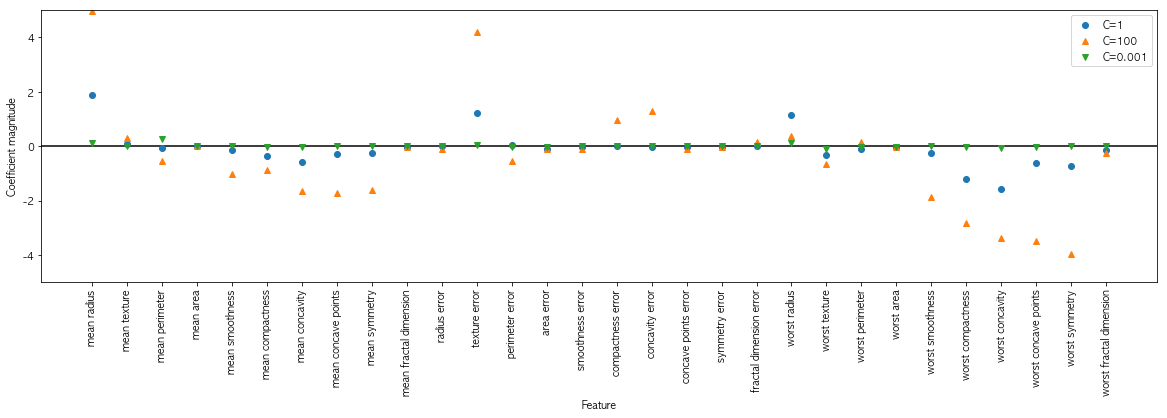

In [78]:
# comparing C parameter

plt.figure(figsize=(20, 5))

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


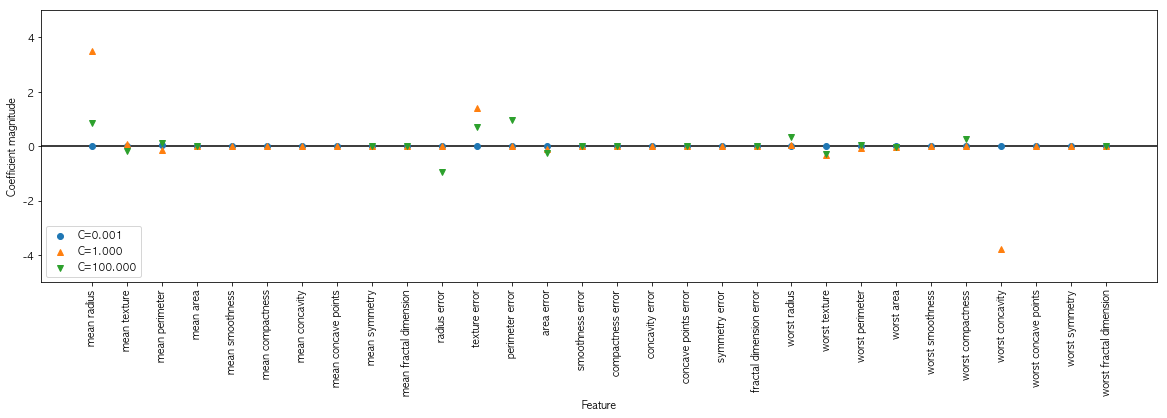

In [83]:
# apply L1 regularization using penalty parameter

plt.figure(figsize=(20, 5))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

-----------

#### 다중 클래스 분류용 선형 모델

- LogisticRegression을 제외하고 linear 모델을 binary classification만 지원
  - LogisticRegression을sms softmax function을 사용해 multi classification 가능
- binary classification을 multi classification으로 확장하는 보편적인 기법은 one-vs-all 방법
  - one-vs-all?
  - 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습, 결국 클래스의 수만큼 이진 분류 모델일 만들어짐
  - 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택
  - 만들고 나면 각 클래스가 w와 b를 하나씩 갖게 되고, 결과 중 가장 높은 클래스가 label이 결정됨

-- TODO : 수식 적어서 정리 하기

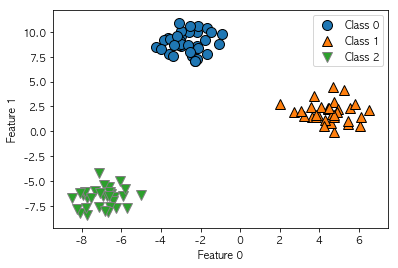

In [84]:
# example, 2-D dataset, Gaussian distribution data

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [86]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [87]:
linear_svm.coef_

array([[-0.17491936,  0.23140472],
       [ 0.47621514, -0.06936546],
       [-0.18914488, -0.20399784]])

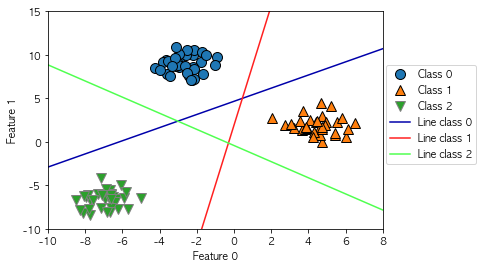

In [88]:
# 세 개의 이진 분류기로 경계 시각화

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

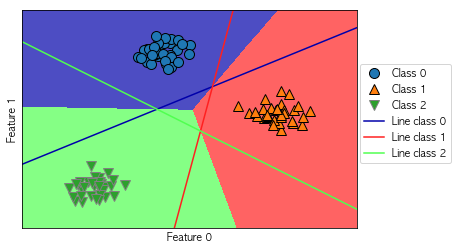

In [89]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 장단점과 매개변수

회귀 모델에서는 C와 Alpha를 조정하는 것이 중요
- log scale로 최적치를 정함
  - 0.01, 0.1, 1, 10 등

L1, L2 중 어떤 것을 사용해야 할지 고민
- 특성이 많지 않다면 L1을, 그렇지 않을 경우 L2를 사용하는 것이 낫다.
- L1이 모델의 해석의 중요한 요소일 때도 사용할 수 있다.
  - 몇 가지만으로도 모델의 중요 특성이 무엇이고, 효과가 어느 정도인지 설명하기가 쉽다.

선형 모델을 학습 속도가 빠르고, 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동
  - 수십만~수백만의 샘플의 대용량 데이터셋의 경우 기본 설정을 빨리 처리하도록 아래와 같이 설정
  - LogisticRegression, Ridge의 solver='sag' 옵션 설정
    - sag는 Stochastic Average Gradient Descent의 약자로 반복이 진행될 때 이전에 구한 모든 경사의 평균을 사용하여 계수를 갱신
  - 또는, 선형 모델의 대용량 처리 버전으로 구현된 SGDClassifier, SGDRegressor를 사용
    - SGD는 Stochastic Gradient Descent(확률적 경사 하강법)의 약자
- 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해 가능
  - 물로 안 되는 경우도 있음
- 선형 모델을 샘플에 비해 특성이 많을 때 잘 작동
- 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델 많이 사용


그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 낫다.

### 2.3.4 Naive Bayes classification

- LogisticRegression, LinearSVC 보다 속도가 빠르지만, 일반화 성능이 다소 떨어짐
- 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합
  - GaussianNB, BernoulliNB, MultinomialNB in sklearn
  - GaussianNB
    - 연속적인 어떤 데이터에도 적용 가능
  - BernoulliNB
    - 이진 데이터 분류, 이산적인 데이터(discrete data)
  - MultinomialNB
    - 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트, 예를 들면 문장에 나타난 단어의 횟수)에 적용, 이산적인 데이터(discrete data)
    
#### 장단점과 parameters
GaussianNB
- 대부분 매우 고차원인 데이터셋에 사용

BernoulliNB, MultinomialNB
- 텍스트 같은 희소한 데이터를 카운트 하는데 사용

장단점은 선형 모델과 비슷
- 훈련과 예측 속도가 빠르며 과정을 이해하기 쉽다.
- 비교적 parameter에 민감하지 않음
- 선형이 오래 걸린다면, 나이브 베이즈 모델로 시도해볼 가치는 있음

In [67]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

In [68]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [60]:
# 2-d array index slicing

y == 0

array([ True, False,  True, False])

In [69]:
for label in np.unique(y):
    print(label)
    print(X[y==label].sum(axis=0))

0
[0 1 0 2]
1
[2 0 2 1]


### 2.3.5 Decision Trees

회귀 문제에 널리 사용하는 모델
- Yes or No 질문을 이어 나가면서 판별
- 스무고개 생각하면 이해가 쉬움

![alt text](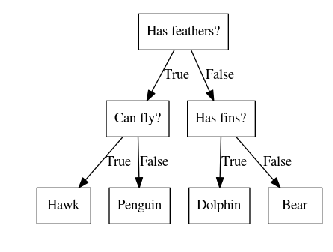%0A)

- 트리의 node(노드) : 질문이나 정답을 담은 네모 상자
  - 마지막 노드는 leaf라고 함
- 트리의 edge는 질문을 연결

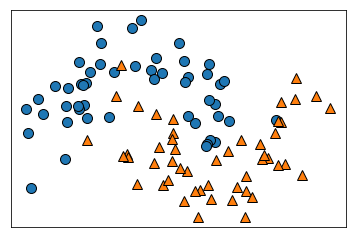

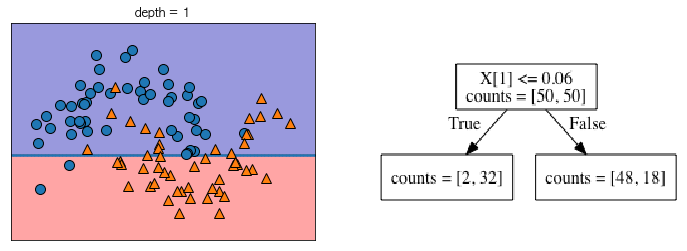

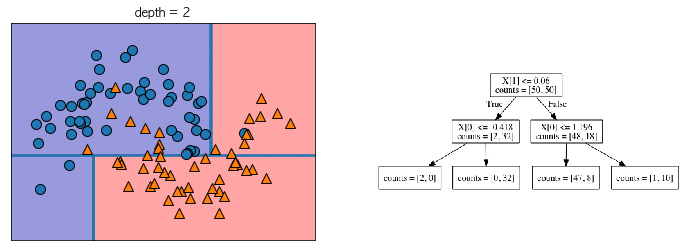

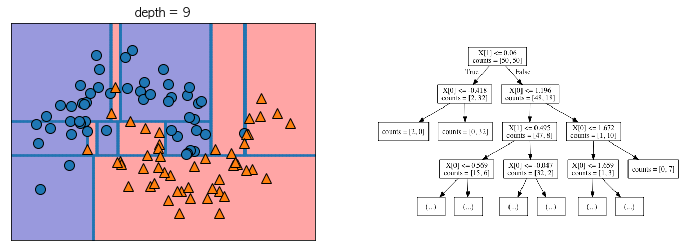

In [105]:
mglearn.plots.plot_tree_progressive()

**notice**
- 위 내용은 https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb 확인 가능

#### 결정 트리의 복잡도 제어하기

일반적으로 트리 만들 떄 모든 리프 노드가 순수 노드(타깃 하나로만 이뤄진 리프 노드)가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됨
- 당연한 듯...train data에 꼭 맞으니까..
- 바람직한 건 아님, outlier 값에 민감하게 작용

어떻게 overfitting을 막을 수 있을까?
- pre-pruning : 사전 가지치기
  - 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 노드가 분할하기 위한 포인트의 최소 개수를 지정
  - sklearn은 이것만 지원함
- 데이터 포인트가 적은 노드를 삭제하는 방법
  - post-pruning

In [98]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


**notice**
- Accuracy on training set: 1.000 이 되었다.
  - 과대적합
  - 결정 트리의 깊이를 제한해야함

In [101]:
# max_depth : 트리의 성장을 제어, 어느 깊이까지 갈 것인가?
# train 결과는 떨어뜨리지만, test 결과는 높일 수 있다.

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### 결정 트리 분석

In [102]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree, out_file="tree.dot", class_names=["malignant", "benign"],
    feature_names=cancer.feature_names, impurity=False, filled=True
)

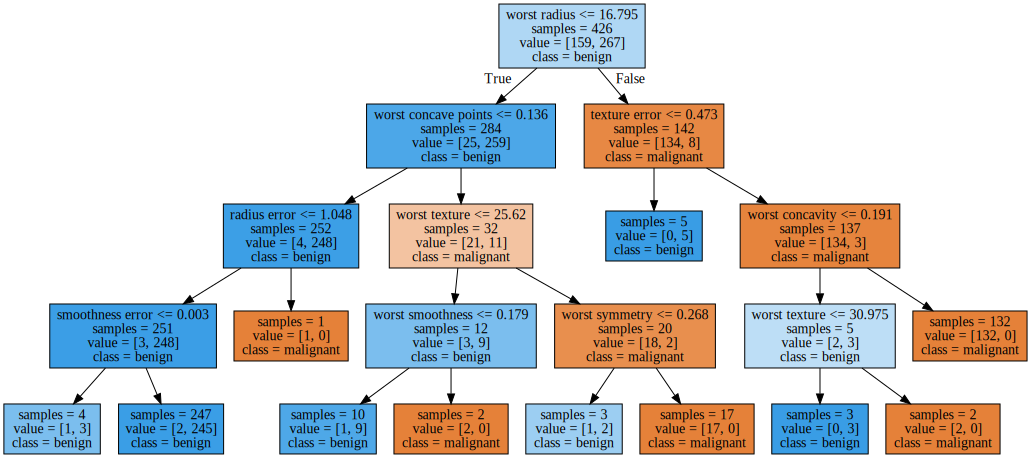

In [104]:
# error 대응 : https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 트리의 특성 중요도

트리가 어떻게 작동하는지 요약하는 내용을 보고 속성들을 사용할 수 있다.

**feature importance**
- 0과 1사이의 숫자로 표현하고, 각 특성에 대해 0은 전혀 사용되지 않은 것을 의미, 1은 완벽하게 target을 예측했다는 뜻
- feature importance의 총합은 1

In [106]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


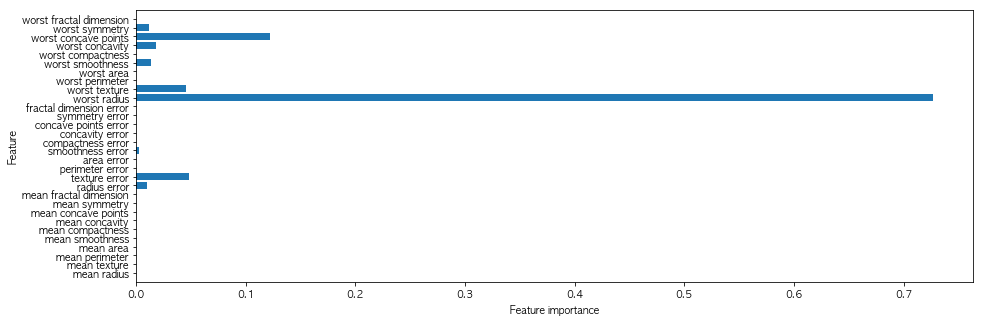

In [111]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(15, 5))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

해석해보자

- 첫 번째 노드에서 사용한 특성("worst radius")가 가장 중요한 특성으로 나옴
  - 첫 번쨰 노드에서 두 클래스를 꽤 잘 나누고 있다는 것을 증명해줌
- 그러나 feature_importance_ 값이 낮다고 해서 유용하지 않다는 뜻은 아님
  - 단지, 그 트리가 그 특성을 선택하지 않았을 뿐이며, 다른 특성이 동일한 정보를 지니고 있어서 일 수 있다.
- 모든 값은 양수이나, 어떤 클래스를 지향하는지는 알 수 없다.

Feature importances: [0. 1.]


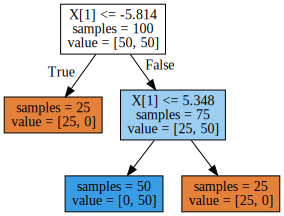

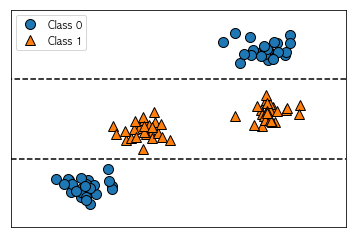

In [112]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

/anaconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


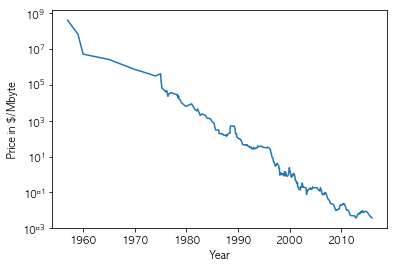

In [113]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [114]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/anaconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


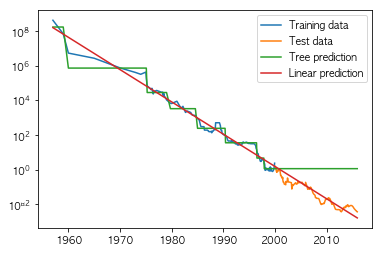

In [115]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

**중요**

tree 모델은 train 데이터 밖의 새로운 데이터를 예측할 능력이 없다.
- 모든 트리 모델의 공통된 단점

#### 장단점, parameters

pre-pruning(사전 가지치기)
- max_depth
  - 트리의 성장을 제어, 어느 깊이까지 갈 것인가?
- max_leaf_nodes
  - leaf node의 최대 개수를 지정하는 매개변수
- min_samples_leaf
  - leaf node가 되기 위한 최소한의 샘플 개수를 지정
- min_samples_split
  - 노드가 분기할 수 있는 최소 샘플 개수를 지정
- min_impurity_decrease
  - 분할하면서 얻어지는 impurity 감소 최솟값을 지정
  
장점
- 만들어진 모델을 쉽게 시각화 할 수 있다.(작은 트리 일 때...)
- 데이터의 스케일에 구애받지 않음
  - 각 특성이 개별적으로 처리되어 데이터를 분할하는 데 데이터 스케일의 영향을 받지 않음
  - 즉, **결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정 필요 없음**
  - 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동

단점
- 사전 가지치기를 사용함에도 overfitting이 될 수 있어서 generalization 성능이 좋지 않음
- 그래서 앙상블을 대안으로 사용함

### 2.3.6

#### Ensemble
- 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
- 대표적으로 random forest, gradient boosting


#### Random forest
- Random forest는 다른 여러 decision tree의 묶음
  - 기본적인 컨셉은 각 트리는 비교적 예측을 잘 할 수 있는데, 데이터의 일부에 과대적합하는 경향을 가졌다는 데 기초함
  - 잘 작동하되 서로 다른 방향으로 overfitting하는 트리를 많이 만들고, 그 결과를 평균냄으로써 overfitting이 되는 양을 줄일 수 있다.
  - 이 전략에는 많은 tree가 있어야 함
- decision tree의 overfitting 문제를 회피할 수 있다.
- Random forest는 두 가지 방법으로 구축 가능
  - 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법
  - 분할 테스트에서 feature를 무작위로 선택하는 방법

#### Random forest 구축
랜덤 포레스트 모델 만들려면 트리의 개수 정해야 함
- parameter : n_estimators, default = 100(v0.22)

각 트리가 고유하게 만들어지도록 무작위한 선택
- 트리를 만들기 위해 먼저 데이터의 boostrap sample(부트스트랩 샘플) 생성
  - parameter : n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출(한 샘플이 여러 번 중복 추출 될 수 있다)
  - 이 데이터셋은 원래 데이터셋 크기와 같지만, 어떤 데이터 포인트는 누락 될 수도 있고, 어떤 데이터는 중복되어 들어 있을 수 있다.
- 알고리즘이 각 노드에서 후보 feature를 무작위로 선택한 후 이 후보들 중에서 최선의 테스트 결과를 찾음
  - parameter : max_features
  - 몇 개의 feature를 고를지 선택
  - 핵심은 이거임
  - n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 무작위성이 사라짐(boostrap은 그대로고)
  - max_features=1로 설정하면 테스트할 특성을 고를 필요가 없어서 feature의 임계값을 찾기만 하면 됨
  - 결국 값이 크면 랜덤 포레스트의 트리들은 매우 비슷해지고, 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것임
  - 낮추면 트리들이 많이 달라지고, 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 될 것임

**예측은 어떻게 할까?**
- 먼저 알고리즘이 모델에 있는 모든 트리의 예측을 만듬
- 회귀의 경우 이 예측들을 평균하여 최종 예측을 만듬
- 분류의 경우 약한 투표 전략을 사용
  - 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접 예측
  - 평균적으로 가장 높은 확률을 가진 클래스가 예측값이 된다.

#### 랜덤 포레스트 분석

In [116]:
# 랜덤포레스트로 만드는 트리는 estimators_속성에 저장됨

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

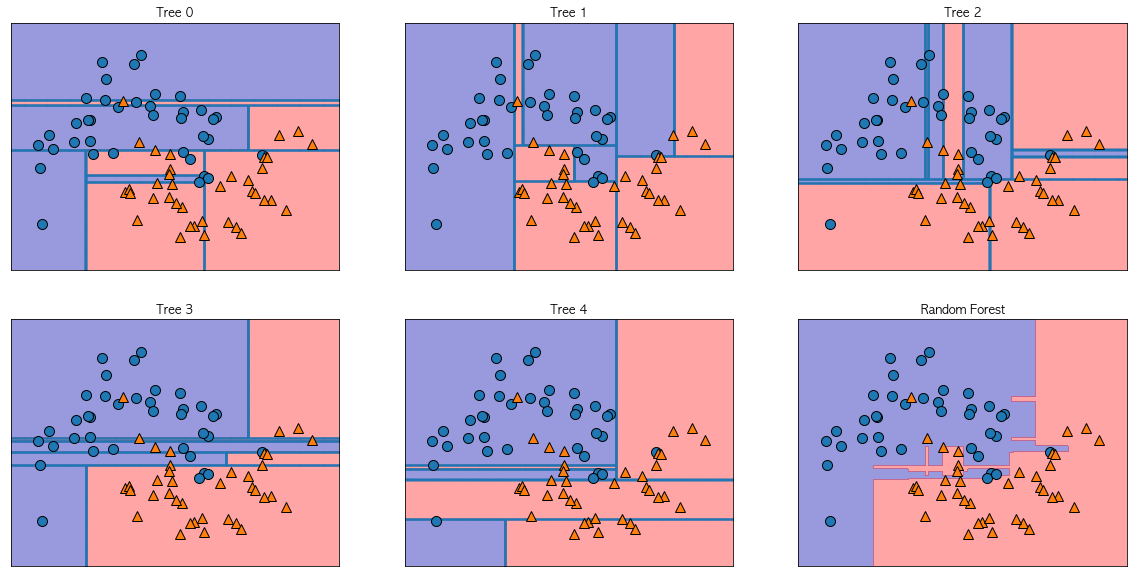

In [117]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [118]:
# 기본 설정만으로도 좋은 performance를 보일 수 있다.

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


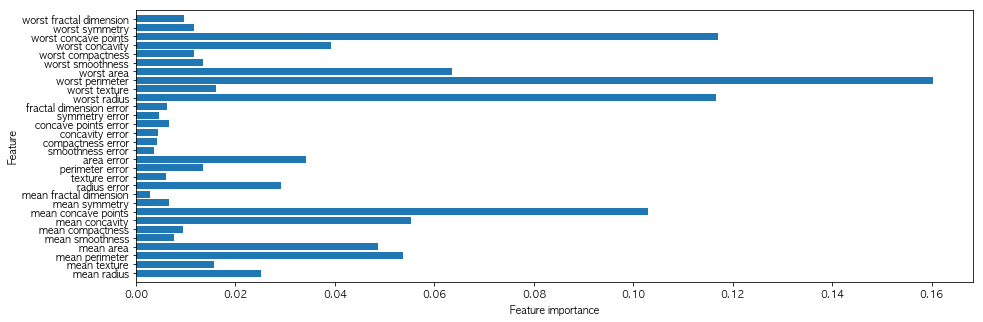

In [119]:
plot_feature_importances_cancer(forest)

#### Strengths, weaknesses, and parameters

- 트리의 단점을 보완하고, 장점은 그대로
- 간소화하게 표현해야 한다면 단일 트리 사용하면 된다.
- 텍스트 데이터와 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않음
  - 오히려 선형이 나음

**parameters**
- n_jobs : 사용할 CPU 코어 수 지정
  - -1일 경우 모든 CPU 코어 사용
- random_state 값을 다른 것으로 지정하면 전혀 다른 모델이 만들어짐
  - 트리가 많을수록 random_state 값의 변화에 따른 변동이 적다.
  - 같은 결과를 얻으려면 고정해야 함
- n_esimators : 트리의 개수 지정, 클수록 좋다.
  - 더 많은 트리를 평균하면 overfitting 방지 가능
  - 메모리와 긴 프로세스 시간은 반대급부
- max_features : 얼마나 무작위가 될지를 결정
  - 작은 max_features는 overfitting을 줄여줌
  - 일반적으로는 기본값을 쓰는 것이 좋은 방법
  - classification : max_features=sqrt(n_features)
  - regression : max_features=n_features

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)

- 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 방법
- 이름은 회귀지만, 회귀와 분류 모두에 사용할 수 있다.
- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듬(랜덤 포레스트와 다른 점)
- 그래서 무작위성이 없음
- 강력한 사전 가지치기를 사용
- 기본적으로 하나에서 다섯 정도의 깊지 않은 트리를 사용
- 메모리를 적게 사용하고 예측도 빠름
- 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아짐
- 이전에 만든 트리의 예측과 타깃값 사이의 오차를 줄이는 방향으로 새로운 트리를 추가하는 알고리즘
  - 이를 위해 loss function을 정의하고 gradient descent를 사용하여 추가될 트리가 예측해야 할 값을 보정합니다.
- 이전 오차를 얼마나 강하게 보정할 것인지 정하는 값이 learning_rate

In [120]:
# overfitting case

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [121]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [122]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


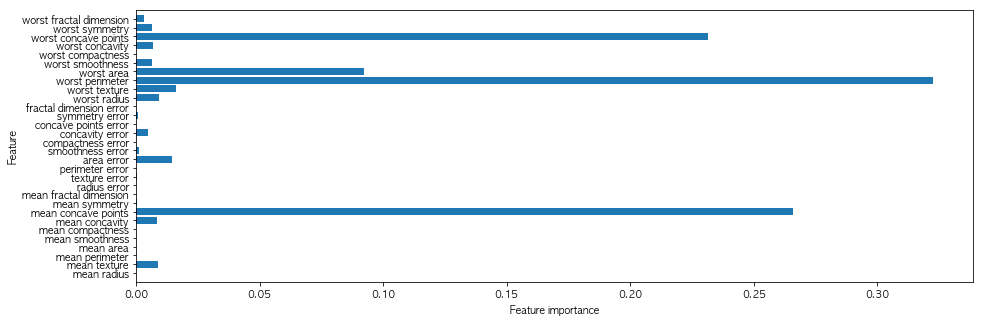

In [123]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

#### Strengths, weaknesses and parameters

장점
- 다른 트리 기반 모델처럼 feature scaling이 필요 없고, 이진, 연속적인 특성에서도 잘 동작

단점
- 매개변수 잘 조정, 훈련 시간이 길다는 것
- 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않음(예를 들면 텍스트)

parameters
- n_estimators : 트리의 개수 지정
  - 클수록 모델이 복잡해지고, overfitting이 될 가능성이 높다.
- learning_rate
  - 값을 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가 해야 함
- max_depth : 통상적으로 5보다 깊어지지 않게 함, 매우 작게 설정
  
적절한 값을 찾는 것이 중요.

### 2.3.7 bagging, extratrees, adaboost

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

#### bagging
- 직관적인 설명이 잘 된 페이지 : https://swalloow.github.io/bagging-boosting
- official document : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
- Boostrap aggregating
- 중복을 허용한 랜덤 샘플링으로 만든 train set을 사용하게 각각의 classifier를 각기 다르게 학습
- classifier가 predict_proba() 메서드를 지원하는 경우 확률값을 평균하여 예측 수행
  - 그렇지 않을경우 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

In [128]:
# LogisticRegression object를 base classifier로 전달하고, train할 classifier 개수를 100개로 지정

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

- LogisticRegression object를 base classifier로 전달하고, train할 classifier 개수를 100개로 지정(n_estimators=100)
- oob_score=True 로 지정하면 parameter는 boostrap에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가
- oob_score로 test set의 성능을 짐작 가능

In [129]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.958
OOB 샘플의 정확도: 0.948


In [134]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, 
                            n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

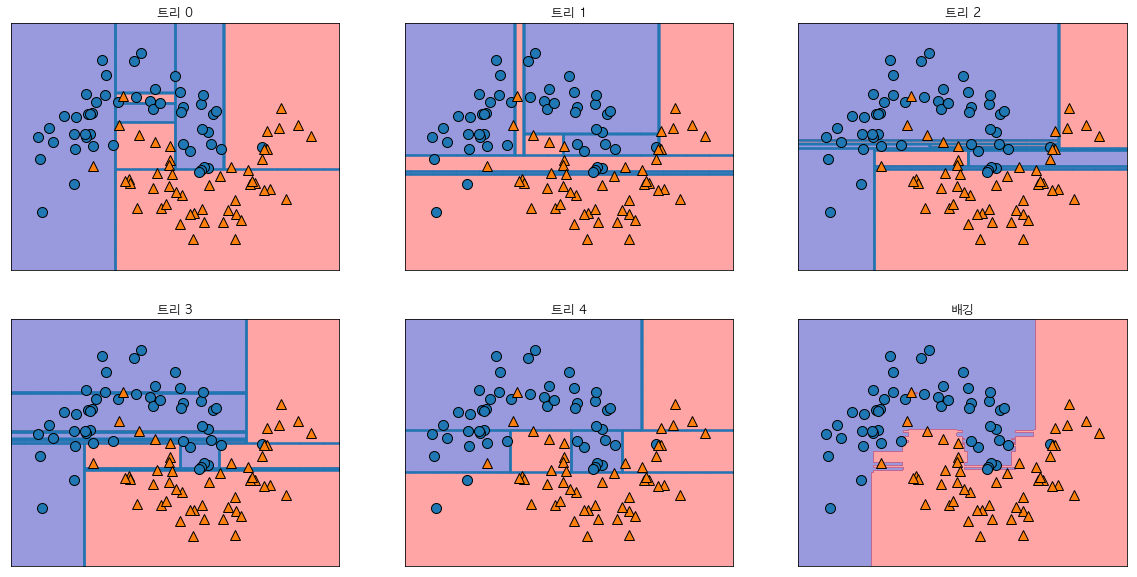

In [135]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [136]:
# n_estimators=100

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [137]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.951


특징
- 배깅은 random forest와 달리 max_samples parameters에서 boostrap sample 크기를 지정할 수 있다.

#### Extra-Trees

- 랜덤 포레스트와 비슷하지만, 후보 feature을 무작위로 분할한 다음 최적의 분할을 찾는다.
- 랜덤 포레스트와 다르게, DecisionTreeclassifier(splitter='random')을 사용하고, boostrap sampling을 적용하지 않음
- 무작위성을 증가시키면 일반적으로 모델의 편향은 늘어나고, 분산은 감소
- 예측 방식은 랜덤 포레스트와 동일하게 각 트리가 만든 확률값을 평균내서 결정

In [138]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

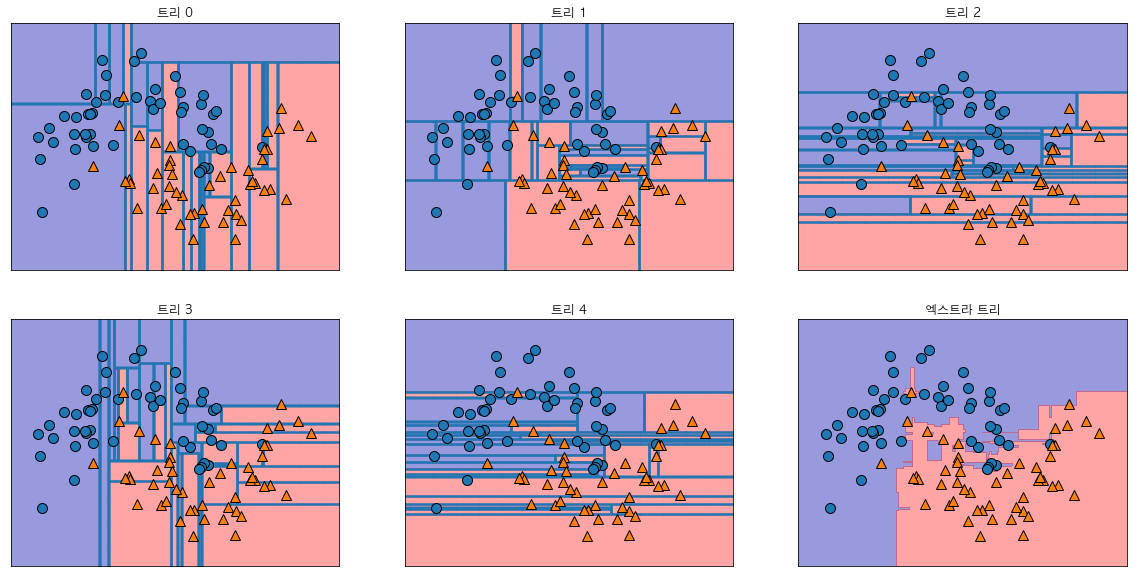

In [139]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [140]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [141]:
print("훈련 세트 정확도: {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


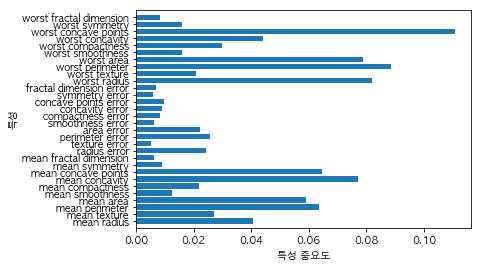

In [142]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

#### Adaptive Boosting
- gradient boosting처럼 week learner(약한 학습기)를 사용함
- 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킴
- 훈련된 각 모델은 성능에 따라 가중치가 부여됨
- 예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블 선택
- 기본적으로 decisiontreeclassfier(max_depth=1)을 사용하고 있어서 단순 경계로 표현됨

In [145]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=5, random_state=42)

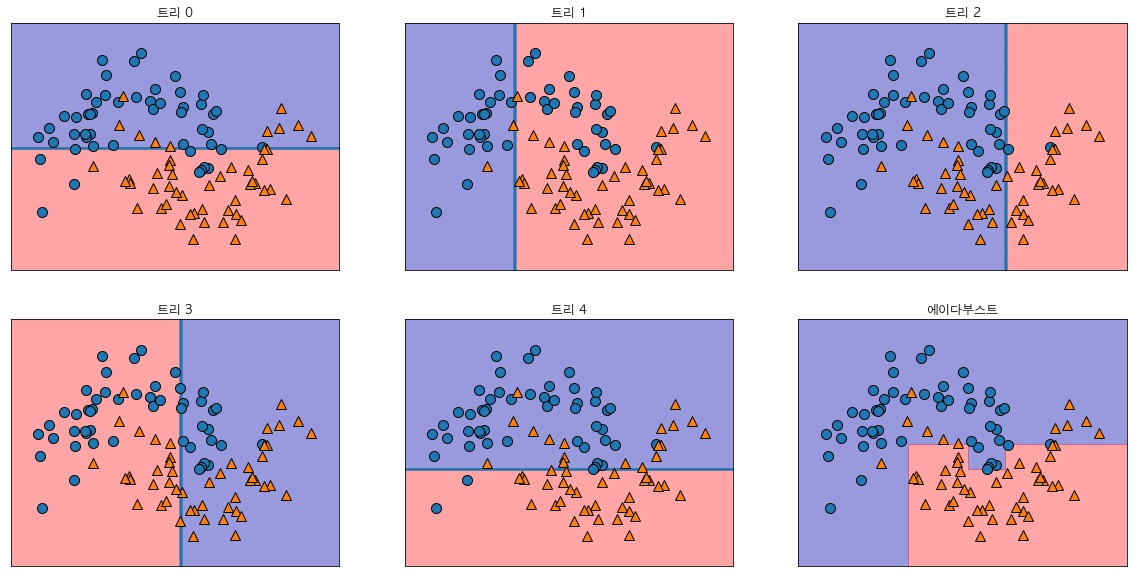

In [146]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [147]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.986


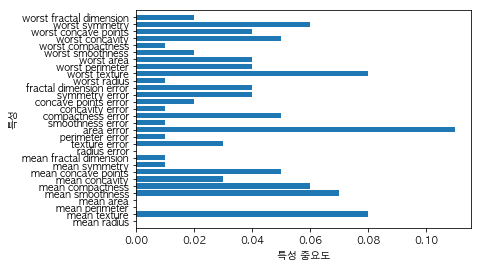

In [148]:
# 다른 모델에서 부각되지 않았던, 'araa error' feature를 강조하고 있다.

plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

### 2.3.8 Kernelized support vector machines

Text(0, 0.5, '특성 1')

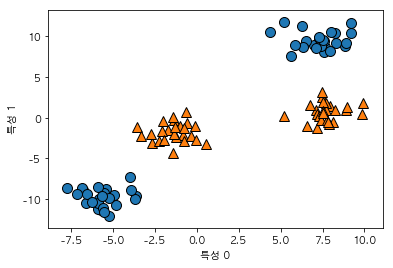

In [149]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

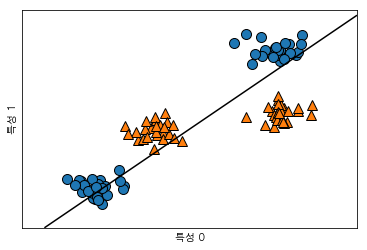

In [150]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

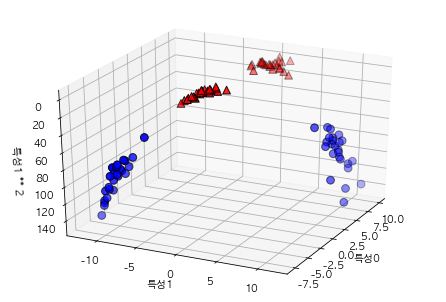

In [151]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

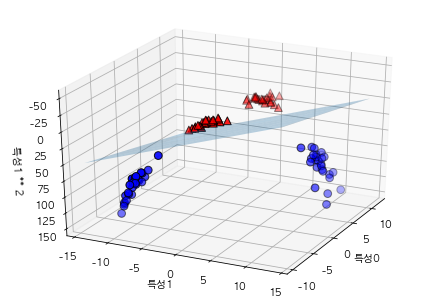

In [152]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

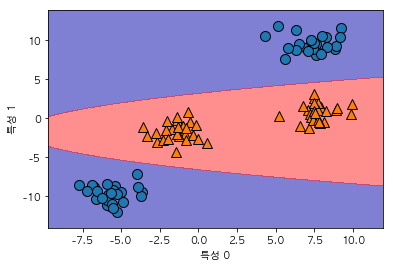

In [153]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 커널 기법

- 단순하게 몇 개의 feature만 사용하면 연산 비용이 적지만, 많을수록 연산 비용이 증가
- 그렇기 때문에 수학적 기교를 사용해서 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있다.
- kernel trick이라고 하며 실제로 데이터를 확장하지 않고, 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 값)을 계산

서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는 방법은 2가지
- 다항식 커널
- Gaussian kernel = RBF(radial basis function)
  - 무한한 특성 공간에 매핑하는 것
  - 모든 차수의 모든 다항식을 고려한다고 이해하면 좋다.
  - 특성의 중요도는 고차항이 될수록 줄어듬 : 테일러 급수 전개 때문

#### SVM을 이해하자

- https://www.youtube.com/watch?v=y4CYcpRiNsw
- decision boundry와 가장 가까운 데이터들을 supprot vector라고 한다.

Text(0, 0.5, '특성 1')

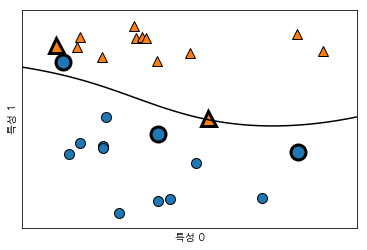

In [154]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### SVM parameter tunning

- gamma : 가우시안 커널 폭의 역수에 해당 
  - 하나의 훈련 샘플이 미치는 영향의 범위 지정
  - 작은 값은 넓은 영역을 뜻하며, 큰 값이라면, 영향이 미치는 범위가 제한적
- C : reguralization과 유사
  - 높을수록 decision boundary가 복잡해짐

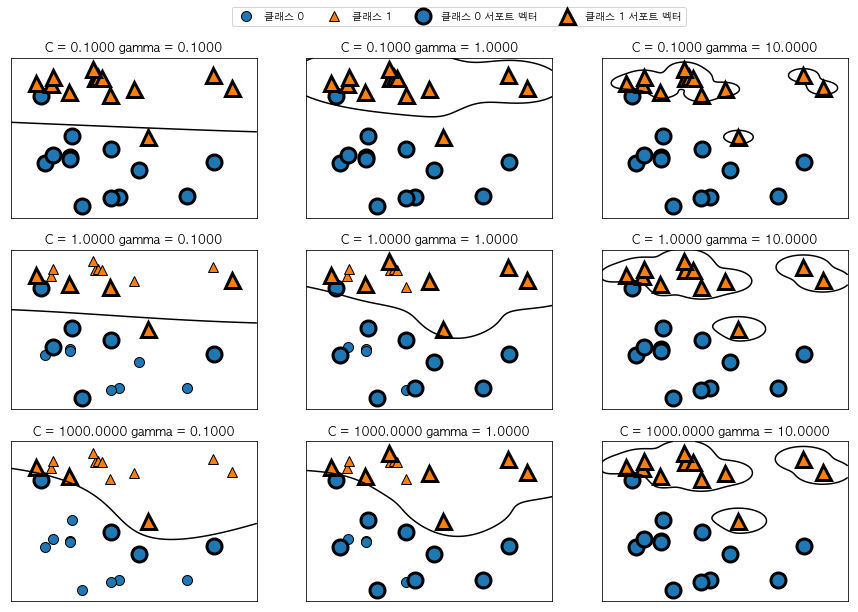

In [155]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, '특성 크기')

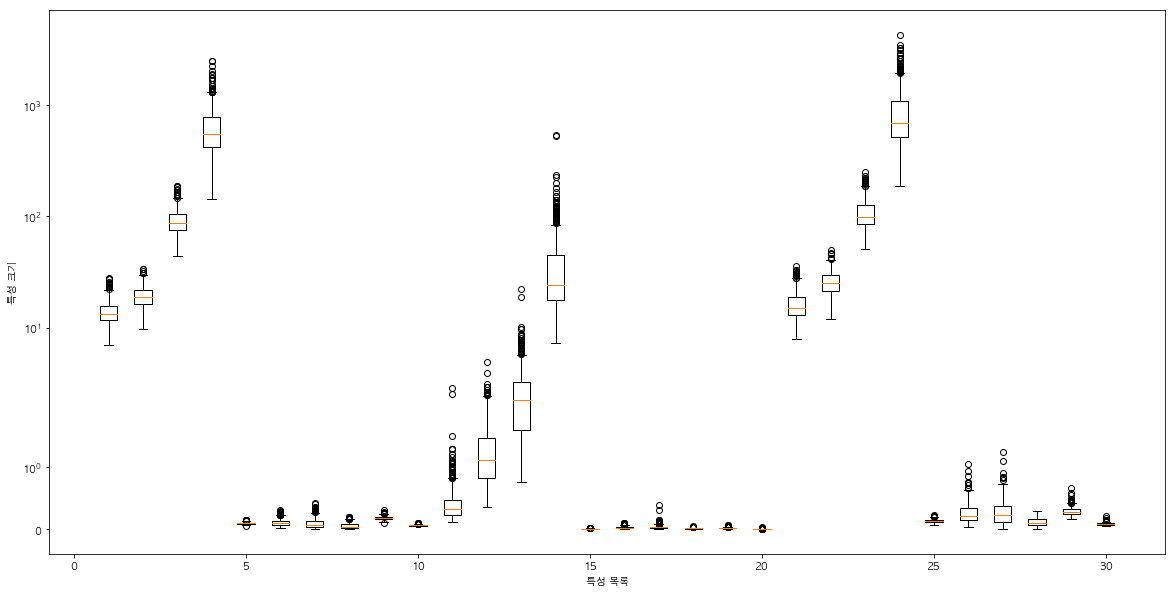

In [158]:
plt.figure(figsize=(20, 10))
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

#### SVM을 위한 데이터 전처리
- 해결 방법 중 하나는 feature 값의 범위가 비슷해지도록 조정하는 것
- kernel SVM에서는 모든 feature 값을 평균 0, 단위 분산이 되도록 하거나, 0과 1사이로 맞추는 방법을 많이 사용
- standardscaler, minmaxscaler 등이 사용됨

In [159]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [160]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### 장단점, parameter

- SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있다.
- 저차원과 고차원의 데이터에 모두 잘 작동하지만, sample이 많을 때는 잘 맞지 않는다.
- 10000개 정도면 잘 작동하지만, 100000개 이상의 경우에는 속도와 메모리 관점에서 도전적인 과제
- 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점
  - 그래서 ...random forest나 gradient boosting을...-0-
  - 분석하기도 어려움
  - 설명도 난해
- 모든 feature가 비슷한 단위이고, 스케일이 비슷하다면 SVM도 시도해볼만함


parameter
- C, gamma